In [26]:
import pandas as pd
import seaborn as sns
import typing as tp

class BaseGraph:
    """
    No documentation here, because there's no reason
    whatsoever for this class to exist
    """
    def __init__(self, 
                 data: tp.Union[str, pd.DataFrame],
                 x: str,
                 y: str,
                 title: tp.Optional[str] = None,
                 xlabel: tp.Optional[str] = None,
                 ylabel: tp.Optional[str] = None
                ) -> None:
        if isinstance(data, pd.DataFrame):
            self.data = data
        elif isinstance(data, str):
            self.data = pd.read_csv(data)  # can throw FileNotFoundError, it's intended
        else:
            raise ValueError('Your data is not str or dataframe')
        if x not in self.data:
            raise ValueError('No column %s in your data' % x)
        if y not in self.data:
            raise ValueError('No column %s in your data' % y)
        self.x = x
        self.y = y
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        
    def plot(self) -> sns.axisgrid.FacetGrid:
        ax = sns.lineplot(x=self.x, y=self.y, data=self.data)
        ax = self._add_style(ax)
        return ax
    
    def _add_style(self, ax: sns.axisgrid.FacetGrid) -> sns.axisgrid.FacetGrid:
        if self.title:
            ax.set_title(self.title)
        if self.xlabel:
            ax.set_xlabel(self.xlabel)
        if self.ylabel:
            ax.set_ylabel(self.ylabel)
        return ax
    
    
class BarGraph(BaseGraph):
    def plot(self) -> sns.axisgrid.FacetGrid:
        ax = sns.barplot(x=self.x, y=self.y, data=self.data)
        ax = self._add_style(ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
        return ax

In [12]:
example = pd.read_csv('checks.csv', sep=';')

data = example.sort_values(by='rev').reset_index(drop=True).reset_index(level=0)
data

,index,student_id,rev
0,0,4822057,199.0
1,1,1683435,199.0
2,2,5523486,199.0
3,3,5486319,199.0
4,4,5484905,199.0
...,...,...,...
536,536,1624158,3660.0
537,537,445767,3660.0
538,538,2150601,3660.0
539,539,5316551,3660.0


<AxesSubplot:xlabel='rev', ylabel='index'>

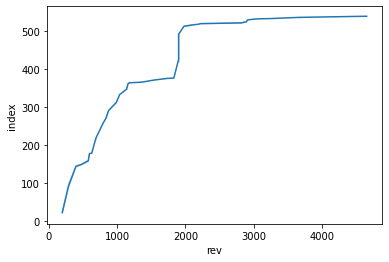

In [4]:
BaseGraph(data, 'rev', 'index').plot()

In [13]:
bar_data = data[['rev', 'index']].groupby('rev').count().reset_index(level=0)
bar_data = bar_data[bar_data['index'] > 5]
bar_data = bar_data.rename(columns={'index': 'count'})
bar_data

,rev,count
0,199.0000,46
1,290.0000,94
2,398.0000,9
4,580.0000,15
5,590.0000,11
8,690.0000,78
10,840.0000,27
11,870.0000,6
13,990.0000,41
16,1140.0000,25


<AxesSubplot:xlabel='rev', ylabel='count'>

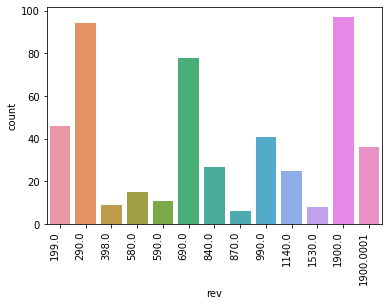

In [14]:
BarGraph(bar_data, 'rev', 'count').plot()

<AxesSubplot:title={'center':'num_of_bills'}, xlabel='revenue', ylabel='count'>

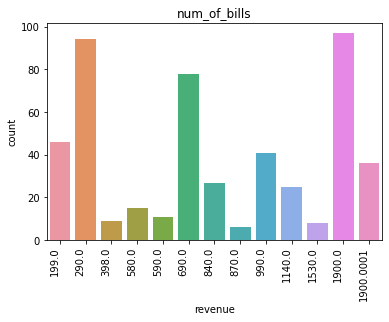

In [18]:
BarGraph(bar_data, 'rev', 'count', title='num_of_bills', xlabel='revenue').plot()

In [19]:
BarGraph(bar_data, 'rev', 'cont').plot()

ValueError: No column cont in your data

In [21]:
BarGraph(bar_data, 'rev').plot()

TypeError: __init__() missing 1 required positional argument: 'y'

In [27]:
BarGraph(42, 'rev', 'count').plot()

ValueError: Your data is not str or dataframe

Не делайте так, pandas + seaborn автоматизируют процесс более чем достаточно. Да и непонятно, почему этот Graph должен быть классом: хранить внутреннее состояние не нужно, наследование позволяет переиспользовать в основном код, который либо не нужно писать, либо и так выносится в функцию... Что seaborn, что matplotlib.pyplot используют функции-фабрики, и они, подозреваю, потратили некоторое время на архитектуру проекта.